<a href="https://colab.research.google.com/github/Amzilynn/Drug-Potency-Predictor-AChE/blob/main/CDD_ML_Part_2_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-20 22:26:34--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.9’

Miniconda3-py37_4.8 100%[===================>]  81.12M   270MB/s    in 0.3s    

2025-01-20 22:26:35 (270 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.9’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1

In [ ]:
! conda create -n rdkit_env python=3.7 -y
! conda activate rdkit_env


Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/rdkit_env

  added / updated specs:
    - python=3.7


The following NEW packages will be INSTALLED:

  _libgcc_mutex      pkgs/main/linux-64::_libgcc_mutex-0.1-main
  _openmp_mutex      pkgs/main/linux-64::_openmp_mutex-5.1-1_gnu
  ca-certificates    pkgs/main/linux-64::ca-certificates-2024.12.31-h06a4308_0
  certifi            pkgs/main/linux-64::certifi-2022.12.7-py37h06a4308_0
  ld_impl_linux-64   pkgs/main/linux-64::ld_impl_linux-64-2.40-h12ee557_0
  libffi             pkgs/main/linux-64::libffi-3.4.4-h6a678d5_1
  libgcc-ng          pkgs/main/linux-64::libgcc-ng-1

In [ ]:
!pip install rdkit-pypi


In [ ]:
from rdkit import Chem
print(Chem.MolFromSmiles('CCO'))


## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data2/bioactivity_data_preprocessed.csv')

In [ ]:
df.shape

(5, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
! python --version


Python 3.7.6


In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski.shape

(5, 4)

In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],100000.0,inactive
1,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],170000.0,inactive
2,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.0,inactive
3,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.0,inactive
4,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],260000.0,inactive


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],100000.0,inactive,382.242,-2.4150,0.0,3.0
1,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],170000.0,inactive,382.242,-2.4150,0.0,3.0
2,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.0,inactive,327.593,-1.9526,1.0,1.0
3,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],200000.0,inactive,327.593,-1.9526,1.0,1.0
4,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],260000.0,inactive,216.550,-1.6745,0.0,0.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm',axis= 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,5.000000
mean,186000.000000
std,58137.767415
min,100000.000000
25%,170000.000000
50%,200000.000000
75%,200000.000000
max,260000.000000


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,100000.0
1,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,170000.0
2,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,200000.0
3,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,200000.0
4,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,216.550,-1.6745,0.0,0.0,260000.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,5.000000
mean,186000.000000
std,58137.767415
min,100000.000000
25%,170000.000000
50%,200000.000000
75%,200000.000000
max,260000.000000


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,4.000000
1,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,3.769551
2,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,3.698970
3,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,3.698970
4,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,216.550,-1.6745,0.0,0.0,3.585027


In [ ]:
df_final.pIC50.describe()

,pIC50
count,5.000000
mean,3.750504
std,0.154358
min,3.585027
25%,3.698970
50%,3.698970
75%,3.769551
max,4.000000


### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,4.000000
1,CHEMBL15886,CC[N+](C)(CC)CC(=O)CCN1C(=O)CCC1=O.[I-],inactive,382.242,-2.4150,0.0,3.0,3.769551
2,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,3.698970
3,CHEMBL556129,C[n+]1ccccc1CCC(O)CCl.[I-],inactive,327.593,-1.9526,1.0,1.0,3.698970
4,CHEMBL15795,C[N+](C)(C)CCCCl.[Br-],inactive,216.550,-1.6745,0.0,0.0,3.585027


In [ ]:
df_2class.shape

(5, 8)

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

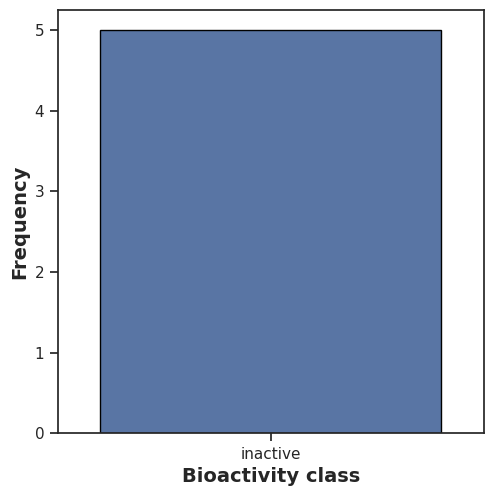

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

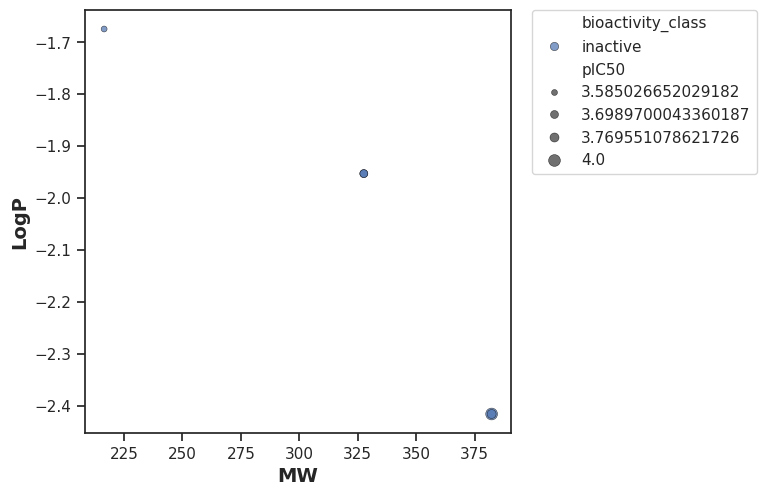

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

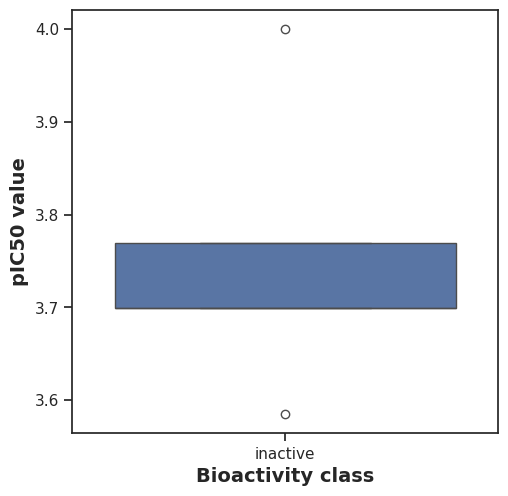

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

ValueError: `x` and `y` must be of nonzero size.

#### **MW**

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

#### **LogP**

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

#### **NumHDonors**

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

#### **NumHAcceptors**

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf